<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_ST_Risk_Regression_27_06_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
"""from google.colab import drive
drive.mount('/content/drive')"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import seaborn as sns
import sklearn.metrics as sm


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  """sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )"""

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")
dataset = pd.read_csv("/content/Fitbit_feature_merged_version_2023.06.26_ST-II&ST-V_Pre.csv")
#dataset=pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.20_ST-II&ST-V_Pre.csv")

target = "ST-II Max-Min Difference"

In [3]:
dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,ST-II Max. Increase,ST-II Max. decrease,ST-II Max-Min Difference,ST-V Max. Increase,ST-V Max. decrease,...,ar_norm_high,ar_ratio,ar_total,sd1,sd2,sd_ratio,ellipse_area,sampen,dfa_alpha1,dfa_alpha2
0,002-JR,pre,Light,10,1,0.2,0.3,0.5,0.3,0.1,...,64.958716,0.539439,19105.45764,6.012997,19.842689,3.299967,374.836049,1.022451,1.470755,0.573684
1,002-JR,pre,Light,10,10,0.2,0.3,0.5,0.3,0.1,...,64.912631,0.540532,18856.43483,6.145682,21.024745,3.421060,405.929592,1.240787,1.234339,1.042289
2,002-JR,pre,Light,10,11,0.2,0.3,0.5,0.3,0.1,...,64.805043,0.543090,19193.83257,6.782934,22.110565,3.259735,471.158801,0.924949,NaN,NaN
3,002-JR,pre,Light,10,12,0.2,0.3,0.5,0.3,0.1,...,64.862213,0.541730,19039.04728,8.357614,28.930985,3.461632,759.618229,1.043804,1.534029,1.049467
4,002-JR,pre,Light,10,13,0.2,0.3,0.5,0.3,0.1,...,65.007546,0.538283,18767.08842,9.978556,44.186165,4.428112,1385.172625,1.504077,1.542662,0.948630
5,002-JR,pre,Light,10,14,0.2,0.3,0.5,0.3,0.1,...,64.868522,0.541580,18800.46155,6.527922,21.178959,3.244365,434.339619,1.376244,1.358871,0.791963
6,002-JR,pre,Light,10,15,0.2,0.3,0.5,0.3,0.1,...,64.795921,0.543307,18778.69359,7.778589,32.874130,4.226233,803.350301,1.712979,1.579461,0.753810
7,002-JR,pre,Light,10,16,0.2,0.3,0.5,0.3,0.1,...,64.784223,0.543586,18906.56635,6.443601,31.820584,4.938323,644.149531,1.029619,1.548781,0.602646
8,002-JR,pre,Light,10,17,0.2,0.3,0.5,0.3,0.1,...,64.778278,0.543727,18563.27065,5.375892,21.911972,4.075969,370.068303,1.252763,1.407493,-0.192170
9,002-JR,pre,Light,10,18,0.2,0.3,0.5,0.3,0.1,...,65.099660,0.536106,18641.14134,7.500777,26.517596,3.535313,624.870861,1.134980,1.640218,0.796802


In [4]:
dataset.dropna(axis=0, how='any', inplace = True)
dataset = dataset.reset_index(drop=True)


In [5]:
dataset.shape

(2629, 84)

In [6]:
X = dataset.iloc[:,11:]
y = dataset.iloc[:, 7]

In [7]:
set(y)

{0.0, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.4}

In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])


X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 7]

Number Of Best Features: 30
              Specs      Score
19           tinn_m  61.342674
1          nni_mean  59.403458
18           tinn_n  52.273329
2           nni_min  51.151625
4           hr_mean  48.327458
3           nni_max  47.908734
59       ar_log_low  47.354449
53       ar_abs_low  47.091222
65         ar_total  44.228992
61      ar_log_high  44.179026
5            hr_min  43.920501
60    ar_log_medium  43.871453
0       nni_counter  43.594672
55      ar_abs_high  43.354364
54    ar_abs_medium  43.273811
6            hr_max  40.480508
48    lomb_log_high  37.710861
47  lomb_log_medium  32.572507
52       lomb_total  32.502907
56       ar_rel_low  31.832050
42    lomb_abs_high  31.669676
58      ar_rel_high  29.783470
64         ar_ratio  26.247496
63     ar_norm_high  26.052207
62      ar_norm_low  26.052207
8     nni_diff_mean  23.766132
41  lomb_abs_medium  23.113841
7            hr_std  22.323107
21        tri_index  22.216142
46     lomb_log_low  21.925101


In [10]:
X_new.shape

(2629, 30)

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)




---



In [12]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#Decision Trees

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [27]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.003)
dtree.fit(X_train, y_train)

pred_train= dtree.predict(X_train)
print("Trainng Result")
res(y_train,pred_train_tree)

print()

pred_test= dtree.predict(X_test)
print("Trainng Result")
res(y_test,pred_test_tree)

Trainng Result
Mean absolute error = 0.36
Mean squared error = 0.23
Median absolute error = 0.26
Explain variance score = 0.3
R2 score = 0.3

Trainng Result
Mean absolute error = 0.36
Mean squared error = 0.22
Median absolute error = 0.26
Explain variance score = 0.33
R2 score = 0.32


In [ ]:

"""for i in range(1,1000):
  l=i/1000
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,l)"""

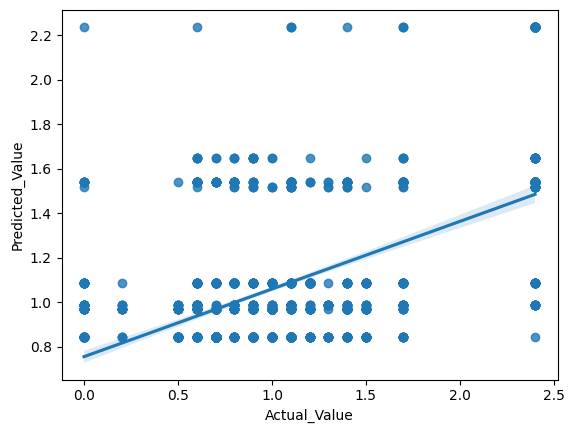

In [28]:
prim_plot(y_train,pred_train)

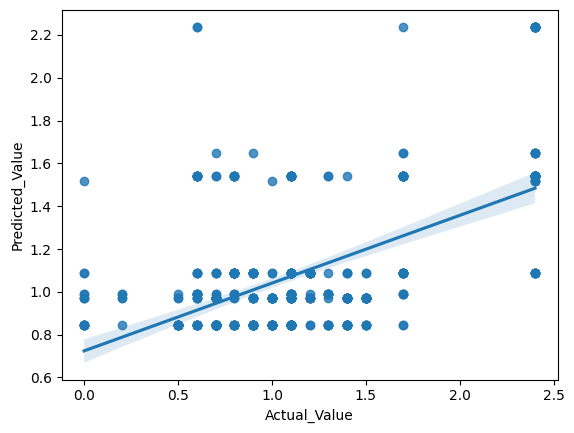

In [29]:
prim_plot(y_test,pred_test)

#Random Forest (or Bootstrap Aggregation)

In [25]:
#RF model
model_rf = RandomForestRegressor(n_estimators=700, oob_score=True)
model_rf.fit(X_train, y_train)

print("Training")
pred_train= model_rf.predict(X_train)
res(y_train,pred_train_rf)

print("Testing")
pred_test = model_rf.predict(X_test)
res(y_test,pred_test_rf)

Training
Mean absolute error = 0.12
Mean squared error = 0.03
Median absolute error = 0.08
Explain variance score = 0.92
R2 score = 0.92
Testing
Mean absolute error = 0.31
Mean squared error = 0.18
Median absolute error = 0.24
Explain variance score = 0.45
R2 score = 0.45


In [ ]:
"""
for i in range(700,3000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)"""

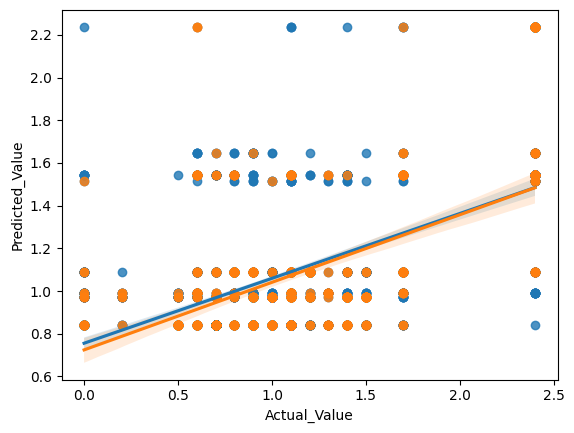

In [30]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Polynomial Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)





print("Training")
pred_train= lin2.predict(X_poly_train)
res(y_train,pred_train)

print("Testing")
X_poly_test = poly.fit_transform(X_test)
pred_test= lin2.predict(X_poly_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.01
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.99
R2 score = 0.99
Testing
Mean absolute error = 6.93
Mean squared error = 782.2
Median absolute error = 1.32
Explain variance score = -2378.7
R2 score = -2401.77


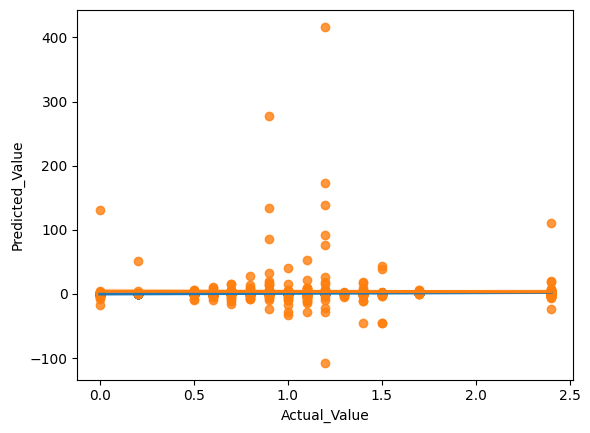

In [16]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Kernel Ridge

In [17]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
pred_train= krr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.4
Mean squared error = 0.27
Median absolute error = 0.32
Explain variance score = 0.19
R2 score = 0.19
Testing
Mean absolute error = 0.4
Mean squared error = 0.26
Median absolute error = 0.33
Explain variance score = 0.21
R2 score = 0.2


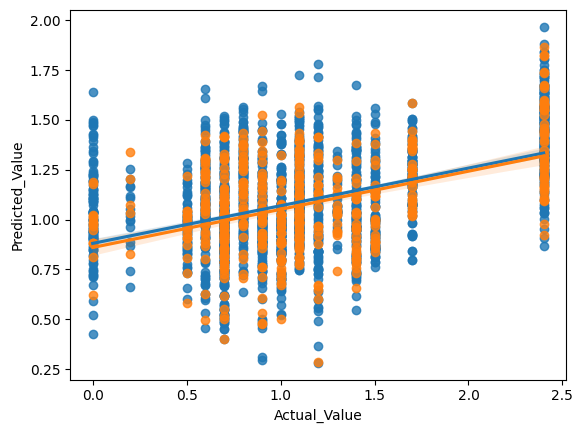

In [18]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#SVM

In [19]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.34
Mean squared error = 0.21
Median absolute error = 0.21
Explain variance score = 0.37
R2 score = 0.37
Testing
Mean absolute error = 0.35
Mean squared error = 0.21
Median absolute error = 0.25
Explain variance score = 0.36
R2 score = 0.35


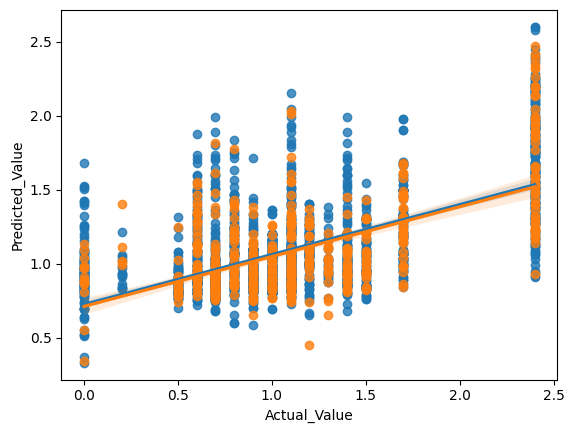

In [20]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Lasso

In [21]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.41
Mean squared error = 0.28
Median absolute error = 0.32
Explain variance score = 0.16
R2 score = 0.16
Testing
Mean absolute error = 0.41
Mean squared error = 0.27
Median absolute error = 0.34
Explain variance score = 0.18
R2 score = 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.068e-01, tolerance: 7.041e-02
  model = cd_fast.enet_coordinate_descent(


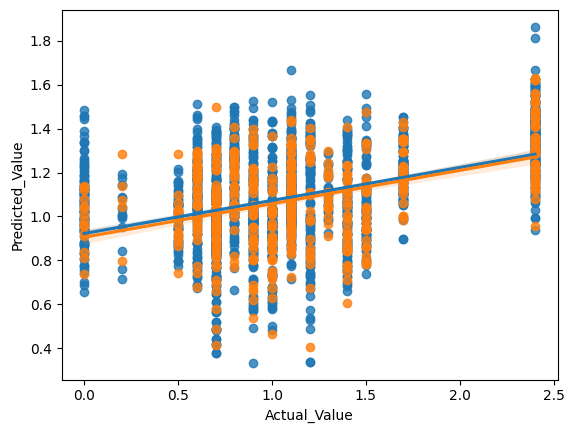

In [22]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#ANN Regression

Text(0.5, 1.0, 'ST-II Max-Min Difference')

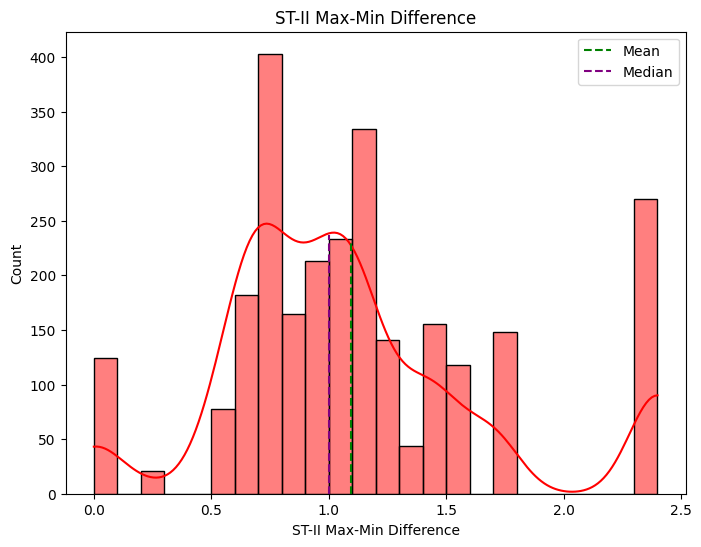

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset,x=target,color="red",kde=True)
plt.axvline(x=dataset[target].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=dataset[target].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("ST-II Max-Min Difference")

Text(0.5, 1.0, 'Cumulative of the Target Column')

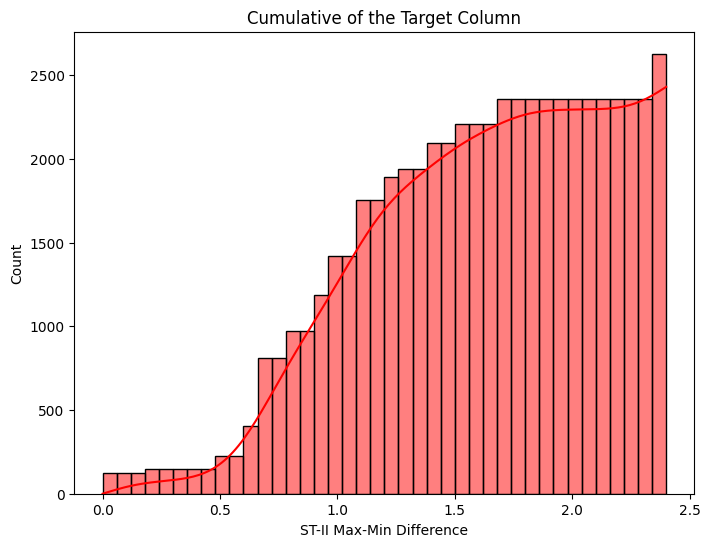

In [26]:
plt.figure(figsize = (8,6))
sns.histplot(dataset[target],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

Epoch 1/100
33/33 [==============================] - 1s 15ms/step - loss: 1480.4705 - val_loss: 92.1720
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 36.2548 - val_loss: 13.5803
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 7.0651 - val_loss: 3.7504
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 2.4628 - val_loss: 1.9049
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 1.5365 - val_loss: 1.4938
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 1.3573 - val_loss: 1.4213
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 1.3237 - val_loss: 1.4037
Epoch 8/100
33/33 [==============================] - 0s 3ms/step - loss: 1.3096 - val_loss: 1.3900
Epoch 9/100
33/33 [==============================] - 0s 3ms/step - loss: 1.2962 - val_loss: 1.3756
Epoch 10/100
33/33 [==============================] - 0s 3ms/step - loss: 1.2823 - val_loss: 1.3606
Ep

<Axes: >

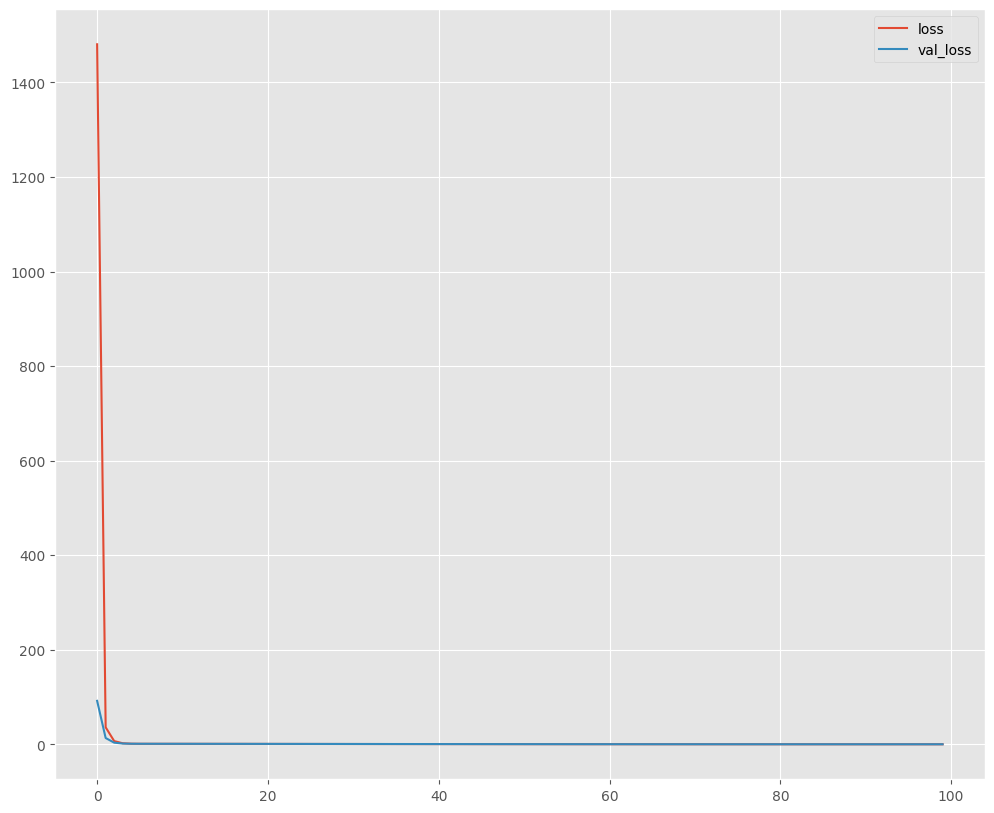

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

#pd.DataFrame(ann.history.history)

plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))


In [28]:
ann.evaluate(X_train,y_train)

66/66 [==============================] - 0s 1ms/step - loss: 0.3363


0.3363410234451294

In [29]:
ann.evaluate(X_test,y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.3361


0.33611348271369934

In [30]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

17/17 [==============================] - 0s 1ms/step


,Real Values,Predictions
0,NaN,1.025799
1,NaN,1.025799
2,NaN,1.025799
3,NaN,1.025799
4,NaN,1.025799
...,...,...
521,NaN,1.025799
522,NaN,1.025799
523,NaN,1.025799
524,NaN,1.025799


Text(0, 0.5, 'Actual Values')

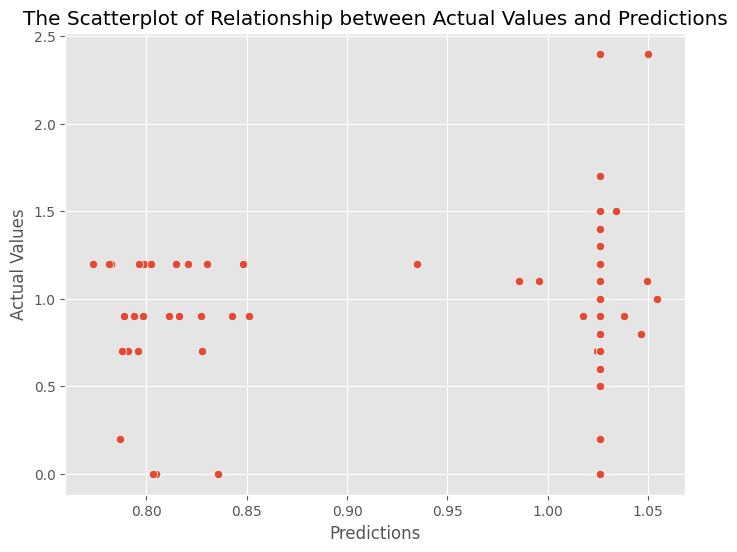

In [31]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.ravel(predictions),y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [32]:
print("Training")
pred_train= ann.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= ann.predict(X_test)
res(y_test,pred_test)

Training
66/66 [==============================] - 0s 1ms/step
Mean absolute error = 0.42
Mean squared error = 0.34
Median absolute error = 0.33
Explain variance score = 0.01
R2 score = -0.0
Testing
17/17 [==============================] - 0s 1ms/step
Mean absolute error = 0.43
Mean squared error = 0.34
Median absolute error = 0.33
Explain variance score = 0.01
R2 score = -0.03
